In [954]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline


In [955]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


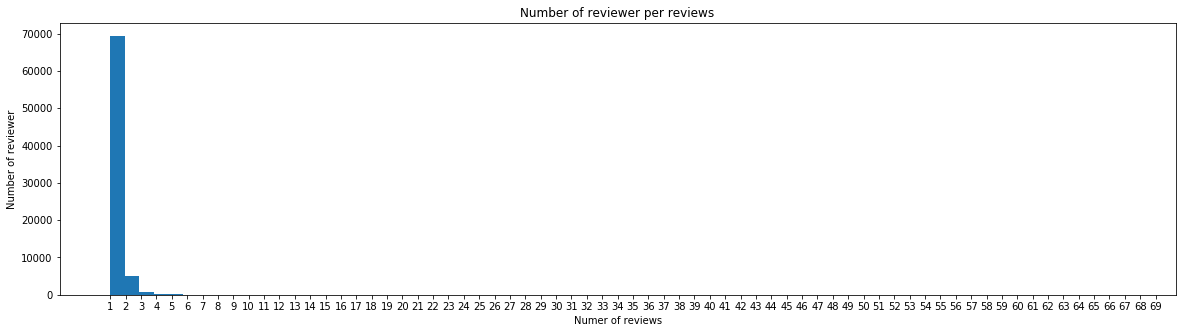

In [956]:
reviewer_ = df_reviews.groupby(df_reviews['reviewer_id']).size()

#plot
plt.figure(figsize=(20,5))
plt.hist(reviewer_, bins=70)
plt.xticks(np.arange(1, 70, step=1))
plt.ylabel('Number of reviewer')
plt.xlabel('Numer of reviews')
plt.title('Number of reviewer per reviews')
plt.savefig('number_reviewer.png')
plt.show()

In [957]:
rest = df_reviews.groupby(df_reviews['reviewer_id']).size()
rest = rest.reset_index().rename_axis(None, axis=1)
rest.columns = ["id","N"]
rest['N'].max()

67

In [958]:
df_reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [959]:
df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [960]:
df_reviews.isnull().mean()

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

In [961]:
df_reviews[pd.isna(df_reviews)['comments'] == True].comments.shape

(18,)

In [962]:
df_reviews[pd.isna(df_reviews)['listing_id'] == True]

,listing_id,id,date,reviewer_id,reviewer_name,comments


In [963]:
set(df_reviews.columns[df_reviews.isnull().mean() > .5])

set()

In [964]:
df_reviews.columns[df_reviews.isna().any()].tolist()

['comments']

In [965]:
group_review = df_reviews['listing_id'].groupby(df_reviews['listing_id'])
group_review= group_review.apply(pd.Series) 
type(group_review)

pandas.core.series.Series

In [966]:
group_review

0        7202016
1        7202016
2        7202016
3        7202016
4        7202016
          ...   
84844    3624990
84845    3624990
84846    3624990
84847    3624990
84848    9727246
Name: listing_id, Length: 84849, dtype: int64

In [967]:
numer_reviews =  group_review.groupby(group_review).transform('count')
frame = { 'id': ids, 'numer_reviews': numer_reviews } 
df_numer_reviews = pd.DataFrame(frame) 
df_numer_reviews.drop_duplicates(subset =["id"], inplace = True)

In [968]:
df_numer_reviews.index = range(df_numer_reviews.shape[0])

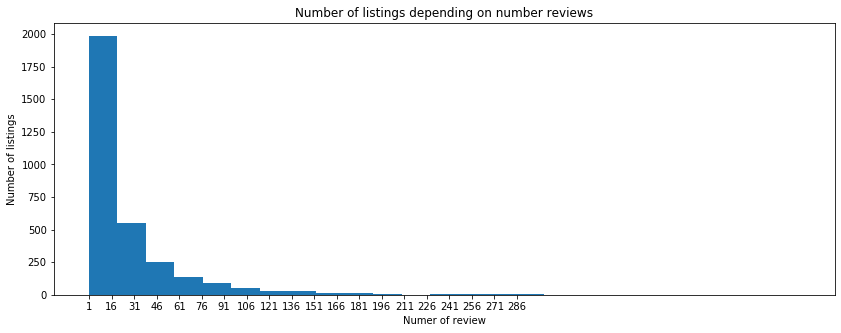

In [969]:
mean_numer_reviews = df_numer_reviews.groupby('id').mean()['numer_reviews']

#plot
plt.figure(figsize=(14,5))
plt.hist(mean_numer_reviews, bins=25)
plt.xticks(np.arange(1, 300, step=15))
plt.ylabel('Number of listings')
plt.xlabel('Numer of review')
plt.title('Number of listings depending on number reviews')
plt.savefig('number_reviews.png')
plt.show()



In [970]:
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [971]:
df_listings.shape

(3818, 92)

In [972]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [973]:
df_listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [974]:
df_listings.isnull().mean()

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
                                      ...   
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
reviews_per_month                   0.164222
Length: 92, dtype: float64

In [975]:
df_listings.columns[df_listings.isna().any()].tolist()

['summary',
 'space',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [976]:
set(df_listings.columns[df_listings.isnull().mean() > .75])

{'license', 'square_feet'}

In [977]:
df_listings[pd.isna(df_listings)['license'] == True].license.shape

(3818,)

In [978]:
df_listings.drop(['license'], axis=1,inplace=True)

In [979]:
df_listings.drop(['square_feet'], axis=1,inplace=True)

In [980]:
columns = set(df_listings.columns[df_listings.isnull().mean() > .5])
df_listings[columns].dtypes 

security_deposit    object
monthly_price       object
dtype: object

In [981]:
df_listings[pd.isna(df_listings)['security_deposit'] == False].security_deposit

1         $100.00
2       $1,000.00
4         $700.00
6         $150.00
7         $150.00
          ...    
3810      $150.00
3812      $500.00
3814      $500.00
3815      $250.00
3816      $300.00
Name: security_deposit, Length: 1866, dtype: object

In [982]:
rest = df_listings.isnull().mean()
print(rest[rest > 0])

summary                        0.046359
space                          0.149031
neighborhood_overview          0.270299
notes                          0.420639
transit                        0.244631
thumbnail_url                  0.083814
medium_url                     0.083814
xl_picture_url                 0.083814
host_name                      0.000524
host_since                     0.000524
host_location                  0.002095
host_about                     0.224987
host_response_time             0.136983
host_response_rate             0.136983
host_acceptance_rate           0.202462
host_is_superhost              0.000524
host_thumbnail_url             0.000524
host_picture_url               0.000524
host_neighbourhood             0.078575
host_listings_count            0.000524
host_total_listings_count      0.000524
host_has_profile_pic           0.000524
host_identity_verified         0.000524
neighbourhood                  0.108958
zipcode                        0.001833


In [983]:
df_listings[df_listings['id'].isin(group_review)]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,1,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,262764,https://www.airbnb.com/rooms/262764,20160104002432,2016-01-04,Fremont Farmhouse,Our 2BR/1 bath home in Fremont's most fun neig...,"1200 ft2 2BR, 1 Bath farmhouse with a large, t...",Our 2BR/1 bath home in Fremont's most fun neig...,none,We love that Fremont is so centrally located t...,...,10.0,8.0,f,WASHINGTON,f,strict,f,f,1,1.56
3811,8578490,https://www.airbnb.com/rooms/8578490,20160104002432,2016-01-04,Super Convenient Top Floor Apt,In the true spirit of AirBNB this unit is avai...,The building is older (1970's) so not the mode...,In the true spirit of AirBNB this unit is avai...,none,I am equidistant to Fremont and Wallingford an...,...,10.0,10.0,f,WASHINGTON,f,moderate,f,f,1,0.63
3812,3383329,https://www.airbnb.com/rooms/3383329,20160104002432,2016-01-04,OF THE TREE & CLOUDS. KID FRIENDLY!,"Of the Tree & Clouds' ""Roots"" apartment is 8 b...","The 1-bedroom, ground-floor Roots apartment is...","Of the Tree & Clouds' ""Roots"" apartment is 8 b...",none,It's taken me a while to figure out why Fremon...,...,9.0,10.0,f,WASHINGTON,t,moderate,t,t,3,4.01
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,10.0,8.0,f,WASHINGTON,f,strict,f,f,8,0.30


In [984]:
df_listings.loc[df_listings['instant_bookable'] == 'f','instant_bookable'] =  0
df_listings.loc[df_listings['instant_bookable'] == 't','instant_bookable'] =  1

In [985]:
df_listings.loc[df_listings['requires_license'] == 'f','requires_license']  =  0

In [986]:
df_listings.loc[df_listings['require_guest_profile_picture'] == 't','require_guest_profile_picture'] = 1
df_listings.loc[df_listings['require_guest_profile_picture'] == 'f','require_guest_profile_picture'] = 0

In [987]:
df_listings.loc[df_listings['require_guest_phone_verification'] == 't','require_guest_phone_verification'] = 1
df_listings.loc[df_listings['require_guest_phone_verification'] == 'f','require_guest_phone_verification'] = 0


In [988]:
df_listings.loc[df_listings['experiences_offered'] != 'none','experiences_offered']

Series([], Name: experiences_offered, dtype: object)

In [989]:
df_listings.drop(['experiences_offered'], axis=1,inplace=True)

In [990]:
df_listings['security_deposit'] = pd.to_numeric(df_listings['security_deposit'].apply(lambda col: str(col).replace('$','')),errors='coerce')

In [991]:
df_listings['price'] = pd.to_numeric(df_listings['price'].apply(lambda col: str(col).replace('$','')),errors='coerce')

In [992]:
df_listings.security_deposit.fillna(0,inplace=True)

In [993]:
df_listings['weekly_price'] = pd.to_numeric(df_listings['weekly_price'].apply(lambda col: str(col).replace('$','')),errors='coerce')

In [994]:
df_listings.weekly_price.fillna(0,inplace=True)

In [995]:
df_listings['monthly_price'] = pd.to_numeric(df_listings['monthly_price'].apply(lambda col: str(col).replace('$','')),errors='coerce')

In [996]:
df_listings.monthly_price.fillna(0,inplace=True)

In [997]:


df_listings = df_listings.dropna(subset=['price'], axis=0)
review_score = df_listings[['price','beds','bedrooms','bathrooms','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']]
fill_mean = lambda col: col.fillna(col.mean())
df_listings_mean = review_score.apply(fill_mean, axis=0)
df_listings = pd.merge(df_listings,df_listings_mean)

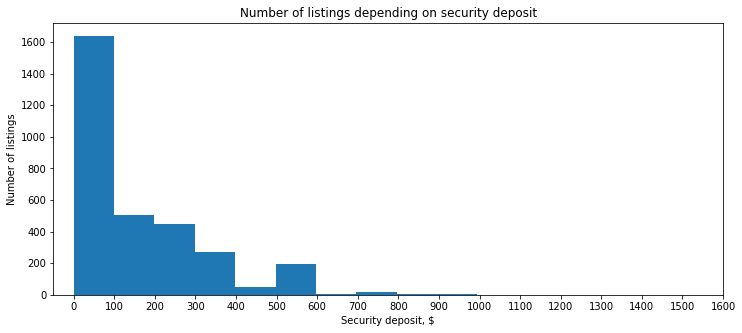

In [998]:
mean_security_deposit_listing = df_listings.groupby('id').mean()['security_deposit']
#plot
plt.figure(figsize=(12,5))
plt.hist(mean_security_deposit_listing, bins=10)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Security deposit, $')
plt.title('Number of listings depending on security deposit')

plt.savefig('security_deposit_distrubution.png')
plt.show()

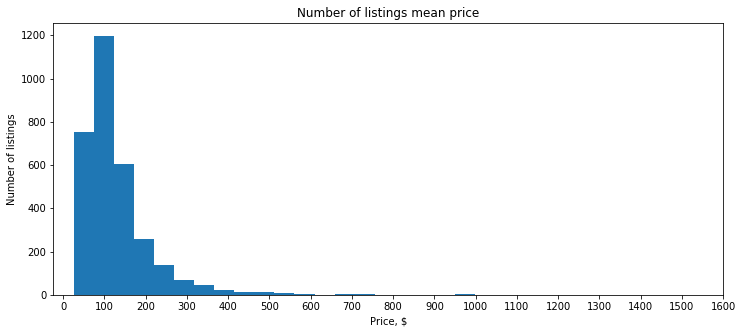

In [999]:
mean_price_for_listing = df_listings.groupby('id').mean()['price']

#plot
plt.figure(figsize=(12,5))
plt.hist(mean_price_for_listing, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Number of listings mean price')
plt.savefig('price_mean.png')

plt.show()

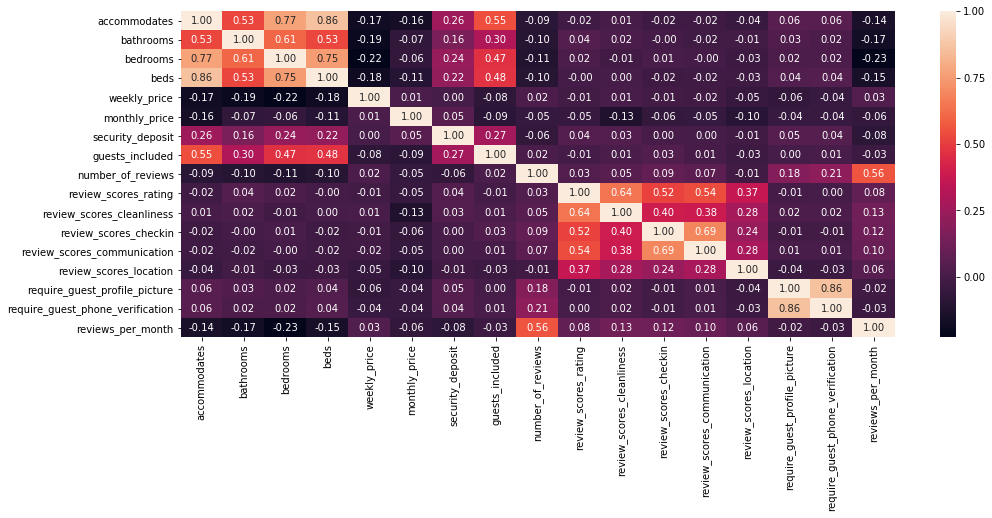

In [1000]:
heat_df = df_listings.drop(['price','scrape_id','host_total_listings_count','latitude','review_scores_value','longitude',
            'availability_30', 'availability_60', 'availability_90','requires_license',
            'calculated_host_listings_count','availability_365','review_scores_accuracy',
            'host_listings_count','id','host_id','property_type','minimum_nights','maximum_nights',
            'instant_bookable'
           ],axis=1)
plt.figure(figsize=(16, 6))
sns.heatmap(heat_df.corr(), annot=True, fmt=".2f")

In [1001]:
dummy_ = df_listings
dummy_ = pd.get_dummies(df_listings['property_type'])
df_listings = pd.merge(df_listings,dummy_, left_index=True, right_index=True)

In [1002]:
rest = df_listings.isnull().mean()
print(rest[rest > 0])

summary                  0.050174
space                    0.104765
neighborhood_overview    0.228463
notes                    0.372042
transit                  0.199432
thumbnail_url            0.081098
medium_url               0.081098
xl_picture_url           0.081098
host_about               0.183970
host_response_time       0.097192
host_response_rate       0.097192
host_acceptance_rate     0.148943
host_neighbourhood       0.065320
neighbourhood            0.097507
zipcode                  0.001893
cleaning_fee             0.240770
dtype: float64


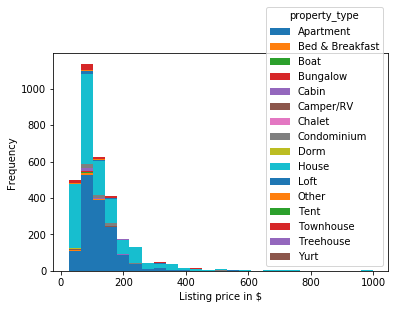

In [1003]:
df_listings_no_nan = df_listings['property_type'].notna()
df_listings_no_nan =  df_listings[df_listings_no_nan]

df_listings_no_nan.pivot(columns = 'property_type',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')
plt.savefig('security_deposit_distrubution.png')

In [1004]:
df_listings_no_nan['Apartment'].mean()

0.4496686651940675

In [1005]:
df_listings_no_nan['House'].mean()

0.4607131587251499

In [1006]:
y = df_listings['price']
col = df_listings.select_dtypes(include=['object']).columns
X = df_listings.drop(col, axis=1) 
X = X.drop(['price','scrape_id','host_total_listings_count','latitude','review_scores_value','longitude',
           'availability_30', 'availability_60', 'availability_90','requires_license',
           'calculated_host_listings_count','availability_365','review_scores_accuracy',
            'host_listings_count','id','host_id'
           ],axis=1)



In [1007]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .25, random_state=42, plot=True):
    
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

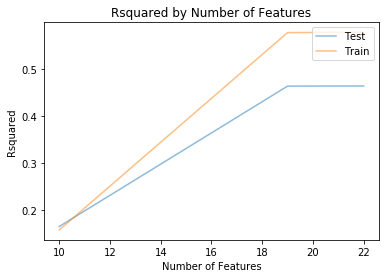

In [1008]:
cutoffs = [15000, 13500, 12500, 11000, 1100, 150, 130, 125]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [1009]:
def coef_weights(coefficients, X_train):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df


In [1010]:
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(20)

,est_int,coefs,abs_coefs
1,bathrooms,30.044859,30.044859
2,bedrooms,26.105144,26.105144
0,accommodates,12.518908,12.518908
21,House,-12.017650,12.017650
15,review_scores_location,11.368770,11.368770
20,Apartment,10.490215,10.490215
7,guests_included,8.264992,8.264992
17,require_guest_profile_picture,7.003527,7.003527
12,review_scores_cleanliness,5.031068,5.031068
16,instant_bookable,4.704367,4.704367


In [1011]:
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [1012]:
set(df_calendar.columns[df_calendar.isnull().mean() > .5])

set()

In [1013]:
df_calendar['price'] = pd.to_numeric(df_calendar['price'].apply(lambda col: str(col).replace('$','')),errors='coerce')

In [1014]:

print('Minimum price per listing is %d$.' % (df_calendar['price'].min()))
print('Maximum price per listing is %d$' % (df_calendar['price'].max()))
print('Average price per listing is %d$.' % (df_calendar['price'].mean()))


Minimum price per listing is 10$.
Maximum price per listing is 999$
Average price per listing is 137$.
